<a href="https://colab.research.google.com/github/jarvisx17/Transformer/blob/main/transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language Translation with Transformers Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="#Approach" data-toc-modified-id="Approach-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Approach</a></span></li><li><span><a href="#Steps" data-toc-modified-id="Steps-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Steps</a></span></li></ul></li><li><span><a href="#Importing-dependencies" data-toc-modified-id="Importing-dependencies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing dependencies</a></span><ul class="toc-item"><li><span><a href="#Check-Tensorflow-version-and-verify-we-are-using-GPU" data-toc-modified-id="Check-Tensorflow-version-and-verify-we-are-using-GPU-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Check Tensorflow version and verify we are using GPU</a></span></li></ul></li><li><span><a href="#Download-the-datasets" data-toc-modified-id="Download-the-datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Download the datasets</a></span><ul class="toc-item"><li><span><a href="#Helpful-functions" data-toc-modified-id="Helpful-functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Helpful functions</a></span></li><li><span><a href="#Define-the-url-paths-for-our-data-downloads-and-create-data-directory" data-toc-modified-id="Define-the-url-paths-for-our-data-downloads-and-create-data-directory-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Define the url paths for our data downloads and create data directory</a></span></li><li><span><a href="#Download-the-data" data-toc-modified-id="Download-the-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Download the data</a></span><ul class="toc-item"><li><span><a href="#Save-the-files-to-./data" data-toc-modified-id="Save-the-files-to-./data-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Save the files to <code>./data</code></a></span></li><li><span><a href="#Extract-the-data" data-toc-modified-id="Extract-the-data-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Extract the data</a></span></li><li><span><a href="#Remove-the-compressed-files" data-toc-modified-id="Remove-the-compressed-files-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Remove the compressed files</a></span></li></ul></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Loading-files" data-toc-modified-id="Loading-files-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Loading files</a></span></li><li><span><a href="#Cleaning-data" data-toc-modified-id="Cleaning-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cleaning data</a></span><ul class="toc-item"><li><span><a href="#Process-non-breaking-prefixes-in-corpus,-and-remove-consecutive-spaces" data-toc-modified-id="Process-non-breaking-prefixes-in-corpus,-and-remove-consecutive-spaces-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Process non-breaking prefixes in corpus, and remove consecutive spaces</a></span></li></ul></li><li><span><a href="#Tokenizing-Text" data-toc-modified-id="Tokenizing-Text-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Tokenizing Text</a></span></li><li><span><a href="#The-vocabulary-size-will-be-used-to-build-the-start-and-end-tokens" data-toc-modified-id="The-vocabulary-size-will-be-used-to-build-the-start-and-end-tokens-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>The vocabulary size will be used to build the <code>start</code> and <code>end</code> tokens</a></span></li><li><span><a href="#Remove-very-long-sentences" data-toc-modified-id="Remove-very-long-sentences-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Remove very long sentences</a></span></li><li><span><a href="#Input-/-Output-creation" data-toc-modified-id="Input-/-Output-creation-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Input / Output creation</a></span></li><li><span><a href="#Create-the-datasets" data-toc-modified-id="Create-the-datasets-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Create the datasets</a></span></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Model-Composition" data-toc-modified-id="Model-Composition-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Model Composition</a></span></li></ul></li><li><span><a href="#Positional-Encoding" data-toc-modified-id="Positional-Encoding-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Positional Encoding</a></span></li><li><span><a href="#Self-Attention" data-toc-modified-id="Self-Attention-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Self-Attention</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Linear-Transformation" data-toc-modified-id="Linear-Transformation-5.2.0.1"><span class="toc-item-num">5.2.0.1&nbsp;&nbsp;</span>Linear Transformation</a></span></li></ul></li><li><span><a href="#Calculate-the-self-attention:" data-toc-modified-id="Calculate-the-self-attention:-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Calculate the self-attention:</a></span></li><li><span><a href="#Multi-Head-Self-Attention" data-toc-modified-id="Multi-Head-Self-Attention-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Multi-Head Self-Attention</a></span></li><li><span><a href="#Attention-Masks" data-toc-modified-id="Attention-Masks-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Attention Masks</a></span><ul class="toc-item"><li><span><a href="#Padding-Mask" data-toc-modified-id="Padding-Mask-5.2.3.1"><span class="toc-item-num">5.2.3.1&nbsp;&nbsp;</span>Padding Mask</a></span></li><li><span><a href="#Look-Ahead-Mask" data-toc-modified-id="Look-Ahead-Mask-5.2.3.2"><span class="toc-item-num">5.2.3.2&nbsp;&nbsp;</span>Look-Ahead Mask</a></span></li></ul></li><li><span><a href="#Attention-computation" data-toc-modified-id="Attention-computation-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Attention computation</a></span></li><li><span><a href="#Multi-head-attention-sublayer" data-toc-modified-id="Multi-head-attention-sublayer-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>Multi-head attention sublayer</a></span></li></ul></li><li><span><a href="#Encoder" data-toc-modified-id="Encoder-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Encoder</a></span><ul class="toc-item"><li><span><a href="#EncoderLayer-Class" data-toc-modified-id="EncoderLayer-Class-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>EncoderLayer Class</a></span></li><li><span><a href="#Encoder-Class" data-toc-modified-id="Encoder-Class-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Encoder Class</a></span></li></ul></li><li><span><a href="#Decoder" data-toc-modified-id="Decoder-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Decoder</a></span><ul class="toc-item"><li><span><a href="#DecoderLayer-Class" data-toc-modified-id="DecoderLayer-Class-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>DecoderLayer Class</a></span></li><li><span><a href="#Decoder-Class" data-toc-modified-id="Decoder-Class-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Decoder Class</a></span></li></ul></li><li><span><a href="#Transformer" data-toc-modified-id="Transformer-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Transformer</a></span><ul class="toc-item"><li><span><a href="#Transformer-Class" data-toc-modified-id="Transformer-Class-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Transformer Class</a></span></li></ul></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Define-Hyper-parameter-values" data-toc-modified-id="Define-Hyper-parameter-values-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Define Hyper-parameter values</a></span></li><li><span><a href="#Define-the-loss-function" data-toc-modified-id="Define-the-loss-function-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Define the loss function</a></span></li><li><span><a href="#Create-a-custom-learning-rate-schedule" data-toc-modified-id="Create-a-custom-learning-rate-schedule-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Create a custom learning rate schedule</a></span><ul class="toc-item"><li><span><a href="#Plot-the-learning-rate" data-toc-modified-id="Plot-the-learning-rate-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Plot the learning rate</a></span></li></ul></li><li><span><a href="#Model-checkpoints" data-toc-modified-id="Model-checkpoints-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Model checkpoints</a></span></li><li><span><a href="#Run-the-training" data-toc-modified-id="Run-the-training-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Run the training</a></span></li></ul></li><li><span><a href="#Evaluating" data-toc-modified-id="Evaluating-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluating</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Translate-function" data-toc-modified-id="Translate-function-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>Translate function</a></span></li></ul></li><li><span><a href="#Let's-translate" data-toc-modified-id="Let's-translate-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Let's translate</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Future Work</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

## Introduction


### Motivation

I undertook this project in order to better understand how `Transformer Models` work. I became interested in the technology when I set out to work on a language translation model using an `RNN`. However, in learning about `RNN`s and `LSTM`s I came across `Transformers`. As I started to learn more I realiazed that I needed shift to this model for my project.

Since the paper [Attention is all you need](https://arxiv.org/abs/1706.03762) was published in 2017, introducing transformers,  they and their many variants have become the models of choice for `Natural Language Processing` - `NLP`. They are used for to solve many types sequence to sequence problems including language translation, information retrieval, text classification, document summarization, image captioning, and genome analysis. More recently they are showing great results in `image recognition` and `object detection`.

The transformer continues to evolve with new variants such as BERT, GPT-2, GPT-3, and others. And research continues on how to improve them.



### Approach

The model is build from scratch following the method used in the original [Attention is all you need](https://arxiv.org/abs/1706.03762) paper. I also used a number of articles, which I will cite, to better learn and understand the details of the transformer

As this model is built using the `Tensorflow` framework, I leveraged their transformer [tutorial](https://www.tensorflow.org/tutorials/text/transformer) for code inspiration.

I also relied heavily on Jay Alammar's excellent blog post [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/). It's kinda become the standard go-to for the visual representation and description of transformers.

Another great blog post is [What Are Transformer Models in Machine Learning?](https://lionbridge.ai/articles/what-are-transformer-models-in-machine-learning/) by Rahul Agarwal.

No doubt that you too will find many other great articles.

### Steps

1. We start by loading all of the dependencies
2. Download the and extract data
3. Do some data preprocessing
4. Tokenize the data
5. Prep data for embedding
6. Explain and code Positional Encoding
7. Explain and code Self-attention
8. Explain and code the Encoder
9. Explain and code the Decoder
10. Explain and code the Transformer
11. Train the transformer is explaination
12. Expalain how the model does inferencing.


## Importing dependencies

In [ ]:
import os
import sys
import tarfile
import zipfile as zf
import requests as rq

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import re
import time
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
os.chdir('drive/My Drive')
ROOT = os.getcwd()
os.chdir(ROOT + '/Colab Notebooks')

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass
import tensorflow as tf

from tensorflow.keras import layers
import tensorflow_datasets as tfds

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### Check Tensorflow version and verify we are using GPU

In [ ]:
print(f'TensorFlow Version: {tf.__version__}')
print(f'Using CUDA: {tf.test.is_built_with_cuda()}')
print(f'Using GPU: {tf.config.list_physical_devices("GPU")}')
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

tf.config.experimental.set_memory_growth(physical_devices[0], True)

TensorFlow Version: 2.9.2
Using CUDA: True
Using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


## Download the datasets
In this section we download the datasets and supporting files using the `Requests` module. We then extract the corpuses from the tar file to the data directory. We also download two zip files which are also extracted to the data directory.

The dataset comes from the `European Parliament Proceedings Parallel Corpus 1996-2011` found at the [`Statistical Machine Translation`](http://www.statmt.org/europarl/) website. Specifically, we use the [`French-English parallel corpus`](http://www.statmt.org/europarl/v7/fr-en.tgz) . The following description is cited from their site.

>"*The Europarl parallel corpus is extracted from the proceedings of the European Parliament. It includes versions in 21 European languages: Romanic (French, Italian, Spanish, Portuguese, Romanian), Germanic (English, Dutch, German, Danish, Swedish), Slavik (Bulgarian, Czech, Polish, Slovak, Slovene), Finni-Ugric (Finnish, Hungarian, Estonian), Baltic (Latvian, Lithuanian), and Greek.*"

The two zip files contain lists of non-breaking prefixes in French and english. These will be applied in the preprocessing of the datasets. The Urls can be found in the code.


### Helpful functions
The first function simply extracts our datasets from the tarball. The second one removes the tar and zip files after their contents has been extracted.

In [ ]:
#https://stackoverflow.com/questions/6058786/i-want-to-extract-a-tgz-file-and-extract-any-subdirectories-that-have-files-tha
def extract(tar_url, extract_path='.'):
    ''' Fetch tar file and extract to specified path
    '''
    tar = tarfile.open(tar_url, 'r')
    for item in tar:
        tar.extract(item, extract_path)
        if item.name.find(".tgz") != -1 or item.name.find(".tar") != -1:
            extract(item.name, "./" + item.name[:item.name.rfind('/')])


In [ ]:
def remove_files(dir, filelist):
    '''Remove files in filelist from dir
    '''
    for f in filelist:
        print(f'Removing file: {f}')
        os.remove(os.path.join(dir, f))

### Define the url paths for our data downloads and create data directory

In [ ]:
EN_FR_URL = 'http://www.statmt.org/europarl/v7/fr-en.tgz'
PRE_EN_URL = 'https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P85-Non-Breaking-Prefix-en.zip'
PRE_FR_URL = 'https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P85-Non-Breaking-Prefix-fr.zip'

In [ ]:
# Create data directory if necessary
if os.path.isdir('../data') is False:
    os.mkdir('../data')

### Download the data
* Use the requests library to download the files
* Write the files to the data directory
* Extract the data from the files
* Remove the compressed files from data folder


In [ ]:
r_en_fr = rq.get(EN_FR_URL, stream=True)
r_pr_en = rq.get(PRE_EN_URL, stream=True)
r_pr_fr = rq.get(PRE_FR_URL, stream=True)

#### Save the files to `./data`

In [ ]:
with open('../data/fr-en.tgz', 'wb') as fr_en:
    for chunk in r_en_fr.iter_content(chunk_size=1024):
        if chunk:
            fr_en.write(chunk)

In [ ]:
with open('../data/P85-Non-Breaking-Prefix-en.zip', 'wb') as pre_en:
    for chunk in r_pr_en.iter_content(chunk_size=1024):
        if chunk:
            pre_en.write(chunk)

In [ ]:
with open('../data/P85-Non-Breaking-Prefix-fr.zip', 'wb') as pre_fr:
    for chunk in r_pr_fr.iter_content(chunk_size=1024):
        if chunk:
            pre_fr.write(chunk)

#### Extract the data

In [ ]:
extract('../data/fr-en.tgz', extract_path='../data')

In [ ]:
import zipfile as zf
with zf.ZipFile('../data/P85-Non-Breaking-Prefix-en.zip') as archive:
    archive.printdir()
    archive.extract('P85-Non-Breaking-Prefix.en', '../data/')

File Name                                             Modified             Size
P85-Non-Breaking-Prefix.en                     2019-11-29 10:20:32          110
__MACOSX/._P85-Non-Breaking-Prefix.en          2019-11-29 10:20:32          761


In [ ]:
with zf.ZipFile('../data/P85-Non-Breaking-Prefix-fr.zip') as archive:
    archive.printdir()
    archive.extract('P85-Non-Breaking-Prefix.fr', '../data/')

File Name                                             Modified             Size
P85-Non-Breaking-Prefix.fr                     2019-11-29 10:20:58          121
__MACOSX/._P85-Non-Breaking-Prefix.fr          2019-11-29 10:20:58          576


#### Remove the compressed files

In [ ]:
filelist = ['P85-Non-Breaking-Prefix-en.zip', 'P85-Non-Breaking-Prefix-fr.zip', 'fr-en.tgz']
remove_files('../data', filelist)

Removing file: P85-Non-Breaking-Prefix-en.zip
Removing file: P85-Non-Breaking-Prefix-fr.zip
Removing file: fr-en.tgz


## Data preprocessing

### Loading files

Now we assign the files to variables so that we can start the data preprocessing.

In [ ]:
with open(ROOT + "/data/europarl-v7.fr-en.en",
          mode='r',
          encoding='utf-8') as f:
    europarl_en = f.read()

with open(ROOT + "/data/europarl-v7.fr-en.fr",
          mode='r',
          encoding='utf-8') as f:
    europarl_fr = f.read()

with open(ROOT + "/data/P85-Non-Breaking-Prefix.en",
          mode='r',
          encoding='utf-8') as f:
    non_breaking_prefix_en = f.read()

with open(ROOT + "/data/P85-Non-Breaking-Prefix.fr",
          mode='r',
          encoding='utf-8') as f:
    non_breaking_prefix_fr = f.read()

### Cleaning data

The first step in preparing the data is to create two `lists of non-breaking prefixes` from the two files that were downloaded. These non-breaking prefixes indicate words that do not mark the end of a sentence when encountered with a period.
Getting the `lists of non-breaking prefixes` as a clean list of words with a period at the end so it is easier to use.

In [ ]:
# Split into a list
non_breaking_prefix_en = non_breaking_prefix_en.split("\n")
print('Before adding space and period:')
print(non_breaking_prefix_en[len(non_breaking_prefix_en)-6:])
print()

# Add a space to the front and a period to the end
non_breaking_prefix_en = [' ' + pref + '.' for pref in non_breaking_prefix_en]
print('After adding space and period:')
print(non_breaking_prefix_en[len(non_breaking_prefix_en)-6:])

# Do the same for the French file
non_breaking_prefix_fr = non_breaking_prefix_fr.split("\n")
non_breaking_prefix_fr = [' ' + pref + '.' for pref in non_breaking_prefix_fr]

Before adding space and period:
['st', 'a.m', 'p.m', 'vs', 'i.e', 'e.g']

After adding space and period:
[' st.', ' a.m.', ' p.m.', ' vs.', ' i.e.', ' e.g.']


#### Process non-breaking prefixes in corpus, and remove consecutive spaces
We take the following steps to prepare the corpus.
1. Iterate over the non-breaking prefix lists in order to find occurances in the corpus.
2. Add `$$$` to the end of each prefix so that a\they are easy to fine.
3. Find all occurances of periods immediately followed by an alpha-numeric character and add `$$$` between the period and the character.
4. Remove all occurances of `.$$$`. So that there are no longer any non-breaking periods.
5. Replace consecutive spaces with a single space.
6. Split the corpus into a list.

In [ ]:
corpus_en = europarl_en

# Step 1 & 2
for prefix in non_breaking_prefix_en:
    corpus_en = corpus_en.replace(prefix, prefix + '$$$')

# Step 3
corpus_en = re.sub(r"\.(?=[0-9]|[a-z]|[A-Z])", ".$$$", corpus_en)

# Step 4
corpus_en = re.sub(r".\$\$\$", '', corpus_en)

# Step 5
corpus_en = re.sub(r"  +", " ", corpus_en)

# Step 6
corpus_en = corpus_en.split('\n')

# Repeat all steps for the French corpus.
corpus_fr = europarl_fr
for prefix in non_breaking_prefix_fr:
    corpus_fr = corpus_fr.replace(prefix, prefix + '$$$')

corpus_fr = re.sub(r"\.(?=[0-9]|[a-z]|[A-Z])", ".$$$", corpus_fr)
corpus_fr = re.sub(r".\$\$\$", '', corpus_fr)
corpus_fr = re.sub(r"  +", " ", corpus_fr)
corpus_fr = corpus_fr.split('\n')

### Tokenizing Text

Use Tensorflow-datasets' `SubWordEncoder` to create a tokenizer from the corpus. Tokenizing is a type of preprocessing that decomposes parts of a given text into basic units. It encodes the units of text into a numerical representation which can be used for computation. The tokenizer will produce a vocabulary size of *$2^{13}$* or `8,192 tokens`.

In [ ]:
# Tokenizer for English
tokenizer_en = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    corpus_en, target_vocab_size=2**13)

# Tokenizer for French
tokenizer_fr = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    corpus_fr, target_vocab_size=2**13)

### The vocabulary size will be used to build the `start` and `end` tokens

`Start-of-sentence` and `end-of-sentence` tokens signal to the algorithm when a sentence starts and ends. Here the size of the vocabulary is used to created them.

In [ ]:
# Begin with the vocab_size + 2 as the base for the sos and eos tokens
VOCAB_SIZE_EN = tokenizer_en.vocab_size + 2 # = 8190
VOCAB_SIZE_FR = tokenizer_fr.vocab_size + 2 # = 8171

In [ ]:
# Create the inputs and outputs by iterrating over the corpus and adding the tokens to each sentence
inputs = [[VOCAB_SIZE_EN-2] + tokenizer_en.encode(sentence) + [VOCAB_SIZE_EN-1]
          for sentence in corpus_en]

outputs = [[VOCAB_SIZE_FR-2] + tokenizer_fr.encode(sentence) + [VOCAB_SIZE_FR-1]
           for sentence in corpus_fr]

### Remove very long sentences

We will limit the length of the sentences to some maximum. This will help to speed up computation. To do so, iterate over the input and output lists using `Python's enumerate() function` in order to filter and capture the indexes of long sentences. We then use the indexes to delete the long sentences.

In [ ]:
MAX_LENGTH = 40
# Use enumerate to capture indexes
idx_to_remove = [count for count, sent in enumerate(inputs)
                 if len(sent) > MAX_LENGTH]

# Remove long sentences by index
for idx in reversed(idx_to_remove):
    del inputs[idx]
    del outputs[idx]

# Rinse and repeate!
idx_to_remove = [count for count, sent in enumerate(outputs)
                 if len(sent) > MAX_LENGTH]

for idx in reversed(idx_to_remove):
    del inputs[idx]
    del outputs[idx]

### Input / Output creation

As we train with batches, we need each input to have the same length. We pad with the appropriate token, and we will make sure this padding token doesn't interfere with our training later. `Keras' pad_sequences() method` is perfect for this. We add zeros to the end as needed where sentences are less than `MAX_LENGTH`. Recall that the `end-of-sentence` tokens will signal the true end of the sentences.

In [ ]:
inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                       value=0,
                                                       padding='post',
                                                       maxlen=MAX_LENGTH)

outputs = tf.keras.preprocessing.sequence.pad_sequences(outputs,
                                                        value=0,
                                                        padding='post',
                                                        maxlen=MAX_LENGTH)

### Create the datasets

Passing our data into `Dataset.from_tensor_slices()` converts the data to tensorflow tensors. We pass both the English and French lists, which are sliced into tensors.

We define the `BATCH_SIZE` and the `BUFFER_SIZE`. Care must be taken when choosing the batch size. If it's too large you will quickly exhaust GPU memory and get the dreaded `OOM` error. 64 seems to work fine on `Google Colab` and `Kaggle` but not on `Paperspace Gradient`, or my `ASUS ZenBook`

Care must also be taken when choosing the size of the shuffle buffer. According to the `Tensorflow` documentation - "*For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required*."

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

dataset = tf.data.Dataset.from_tensor_slices((inputs, outputs))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

## Model Building

#### Model Composition
The model is made op of the following basic components:
* Positional Encoders
* Self-Attention Layers
* Point-wise Feed Forward Networks layers

With these componants we create th multi-layer encoder and decoder. Everything is expalined in the sections to follow.

Below is the image illustrating the `transformer architecture`. It shows the parts that together constitute the model. There is a mulit-layer encoder. The output of the encoder is passed to the decoder. And the output of the decoder is the model output.

Note the embedding and positional encoding prior to the encoder and decoder inputs. While not technically part of the model, these steps are necessary. Also note the linear transformation an softmax function that is performed on the decoder outputs.

Continue to read and these will all be explained.

<img src='img/transformer-arch.png' width='500'>
<div align="center" >Image from http://jalammar.github.io/illustrated-transformer/</div>


### Positional Encoding

Unlike sequential algorithms like `RNN`s and `LSTM`, transformers don't have a mechanism buit in to capture the relative positions of words in a sentence. This is important because the distance between words provides crucial contextual information. This is where positional encoding steps in.

Positional encoding is not part of the architecture of the model. It is actually part of the preprocessing. The positional encoding vector is generated to be the same size as the embedding vector for the each word. After calculation, the positional encoding vector is added to the embedding vector. The pattern that is 'injected' into the embedding vector allows the algorithm to learn this spacial information.

So how does it work?

Notice in the formula shown below that PE is a function of the position of the word in the sequence ($pos$), and the embedding ($i$).  First, an angle is calculated using the formula $pos\,/\,10000^{2i\,/\,dmodel}$. Then, either take the sine or cosine of the angle. That gives the value for the word at position $pos$ and embedding index $i$. $pos$ holds constant for the word as the embedding index, $i$ increases, giving a unique pattern for that word.

Upon going to the next word $pos$ increments. This shifts the pattern to the right slightly. The $PE$ formula applies the sine function for even embedding indexes ($i$) and the cosine function for odd embedding indexes. That is why you see an interleving pattern (chekerboard) in the figure below.

So why this formula. The authors of the [paper](https://arxiv.org/abs/1706.03762) explain it this way:

> We chose this function because we hypothesized it would allow the model to easily learn to attend by relative positions, since for any fixed offset $k$, $PE_{pos+k}$ can be represented as a linear function of $PE_{pos}$.

Mathematical explaination from the below mentioned [Reddit](https://www.reddit.com/r/MachineLearning/comments/6jdi87/r_question_about_positional_encodings_used_in/) post.
> If k is fixed, than sin(k/a) and cos(k/a) are constant and PE_{pos+k} is some matrix which depends on k times PE_pos.

> $\begin{align}
PE_{pos+k,2i} &= sin\left(\frac{pos}{a} + \frac{k}{a}\right)\\
              &= cos\left(\frac{pos}{a}\right)sin\left(\frac{k}{a}\right) + sin\left(\frac{pos}{a}\right)cos\left(\frac{k}{a}\right)\\
              &= (PE_{pos,2i+1})\, u + (PE_{pos,2i})\, v \\
              &= (PE_{pos,2i}, PE_{pos,2i+1})\, (v, u)\\
\end{align}$

Here is another great explaination given be Steven Smit in his [blog](https://stevensmit.me/taking-a-look-at-transformer-architecture/):

> One of the reasons for using sine and cosine functions is that they are periodic and so whether the model is learning on a sequence of length 5, or of length 500, the encodings will always have the same range ([-1, 1]).

> Another, perhaps more important reason, is that they allow the model to “learn to attend by relative positions”. This follows because “for any fixed offset $k$, $PE_{pos+k}$ can be represented as a linear function of $PE_{pos$}$.” If you want a derivation of this property, look no further than this comment on [Reddit](https://www.reddit.com/r/MachineLearning/comments/6jdi87/r_question_about_positional_encodings_used_in/).

> This means the model is provided with information to learn the relative proximity between words in the sequence, for any proximity (“fixed k”).

Note that the residual connections within the transformer help to reinforced the positional encoding layer to layer.


Positional encoding formula:

$PE_{(pos,2i)} =\sin(pos/10000^{2i/dmodel})$

$PE_{(pos,2i+1)} =\cos(pos/10000^{2i/dmodel})$

In [ ]:
class PositionalEncoding(layers.Layer):

    def __init__(self):
        super(PositionalEncoding, self).__init__()

    def get_angles(self, pos, i, d_model):
        '''
        pos     - (seq_length, 1) matrix
        i       - (1, d_model) matrix
        d_model - the size of the embedding vectors
        '''
        angles = 1 / np.power(10000., (2*(i//2)) / np.float32(d_model))
        return pos * angles

    def call(self, inputs):
        '''
        inputs - the word embeddings - (batch_size, seq_length, d_model)
        '''
        seq_length = inputs.shape.as_list()[-2]
        d_model = inputs.shape.as_list()[-1]

        angles = self.get_angles(np.arange(seq_length)[:, np.newaxis],
                                 np.arange(d_model)[np.newaxis, :],
                                 d_model)

        # Interleve the results of sine and cosine funtions along the embedding vectors
        angles[:, 0::2] = np.sin(angles[:, 0::2])
        angles[:, 1::2] = np.cos(angles[:, 1::2])

        # Add dimension for batch_size
        pos_encoding = angles[np.newaxis, ...]
        return inputs + tf.cast(pos_encoding, tf.float32)

In [ ]:
if os.path.isdir('../img') is False:
    os.mkdir('../img')

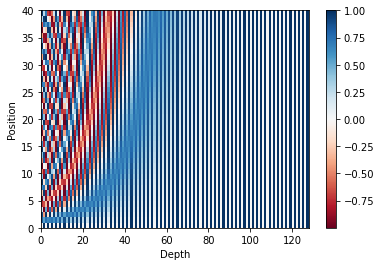

In [ ]:
pos_encoding = PositionalEncoding().call(tf.zeros([1, 40, 128], tf.float32))

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.savefig('../img/pos_enc.png')
plt.show()

### Self-Attention
This is the special sauce in the transformer! It solves the problems of parallelization and loss of contextual information for words that are distant from each other within a sequence. These were issues with seq2seq models such as `RNN`s and `LSTM`s.

The main cause of these issues within those models is that they needed to process each word in a sequence one by one. This meant that they took longer to train. What if we could process all of the words in parallel?

The other issue is the way that context and structure is derived. Those models start by passing the first word (token) to an encoder and calculating a new `state` with a random starting state. Then in the next time step use the next word and the previous state to create a new state. This process is repeated until all words are exhausted at which point a fixed length context vector is generated. The context vector is then passed to the decoder for output generation.

The problem is that by the time the final context vector is computed, contextual information about the earlier states can be loss because the earlier computations do not have access to the later words. In addition the fixed sized context vector may not be large enough to retain all of the information.

So how does the transformer solve these problems?

The transformer's encoders and decoders consume the entire sequence and process all words (embedding) in parallel. Because of this parallelization, training time is reduced. Second, this parallel processing means that the context can be computed from all the words together, resulting in a more complete context.

##### Linear Transformation
The first thing that happens when a sequence of embeddings is passed to the transformer's inputs (encoder and decoder) is that each embedding experiences three separate linear transformations resulting in three vectors - `query`, `key`, and `value`. These transformations occur when the input vectors (embedding) are multiplied by 3 weight matrices. The proper weights are learned through training. The image below represents a vector of seq_length 2 and embedding size of 4.

Why three linear transformations?

Since each `weight matrix` is initialized with random weights, the resultant vectors each learn some different information about the embedding (word) being processed. This is important when calculating the attention score since we don't want to just derive the dot product of the vector with itself.

<img src='img/self-attention-matrix-calculation.png' width='250'>
<div align="center" style="font-weight:bold">Fig 2: Linear Transformation</div>
<div align="center" >Image from http://jalammar.github.io/illustrated-transformer/</div>

Now that we have these 3 vectors for each embedding in the sequence we can calculate the `attention score`. The attention score measure the strength of the relationship between a word in the sequence with all the other words.

#### Calculate the self-attention:
1. Take the query vector for a word and calculate it's `dot product` with the transpose of the `key vector` of each word in the sequence - including itself. This is the `attention score` or `attention weight`.
2. Then divide each of the results by the square root of the dimension of the key vector. This is the `scaled attention score`.
3. Pass the them through a `softmax` function, so that values are contained between 0 and 1.
4. Take each of the `value vectors` and calculate the `dot product` with the output of the `sofmax` function.
5. Add all the `wighted value vectors` together.

Notice in the figure below that we are doing matrix operations on `seq_length x embedding_size` matrices. This shows a toy example of two word with embedding size of 3.

<div align="center" style="font-weight:bold">Attention calculation </div>

<img src='img/self-attention-matrix-calculation-2.png' width='500'>
<div align="center" style="font-weight:bold">Fig 3: Attention</div>
<div align="center" >Image from http://jalammar.github.io/illustrated-transformer/</div>

The `dot product` results in a `seq_length x seq_length` matrix. Think `correlation matrix` where the relationships between any two members can be found by their intersections. In this case the members are words and their intersections are `attention scores`.

Multiplying the `value matrix` `attention matrix` results once again in a `seq_length x embedding_size` matrix. This matrix holds the `contextual information` for each embedding.

#### Multi-Head Self-Attention

What I described above is `single-head self-attention`. In practice we use `multi-head self-attention`. With `multi-head self-attention`, each word is processed by several attention heads. In the original paper they used eight, which is what I use here.

<img src='img/attention-arch.png' width='250'>
<div align="center" style="font-weight:bold">Fig 4: Mutli-Head attention</div>
<div align="center" >Image from https://arxiv.org/pdf/1706.03762.pdf</div>

For `multi-head self-attention`, the `query`, `key`, and `value` vectors are divided by the number of heads, and each segment is passed through a different head. This results in eight vectors which are then concatenated together and transformed by multiplying with another weight matrix so that the resultant vector is the size of the input embedding vector.

<img src='img/transformer_attention_heads_weight_matrix_o.png' width='500'>
<div align="center" style="font-weight:bold">Fig 5: Concatanation of attention vectors</div>
<div align="center" >Image from http://jalammar.github.io/illustrated-transformer/</div>

From the [paper](https://arxiv.org/pdf/1706.03762.pdf):

> Multi-head attention allows the model to jointly attend to information from different representation
subspaces at different positions. With a single attention head, averaging inhibits this.

> $\begin{align}
MultiHead(Q, K, V ) &= Concat(head1, ..., headh)W^O\\
where, head_i &= Attention(QW^Q_i, KW^K_i, VW^V_i)
\end{align}$

> In this work we employ h = 8 parallel attention layers, or heads. For each of these we use
$d_k = d_v =\, ^{d_{model}}/_h = 64$. Due to the reduced dimension of each head, the total computational cost
is similar to that of single-head attention with full dimensionality

#### Attention Masks

Prior to the `softmax` function we need to apply a mask to the `attention score`. The mask will be either a `padding mask` or a combination of the `padding mask` and a `look-ahead mask`.

##### Padding Mask

The sequences that are the input to the `encoder` and the `decoder` must be of the same length. Because sentences are of varying length, one must either truncate the sentence, or pad the sentence so that they are all of a specified length. As a result, the padding might be interpreted as meaningful by the `attention` mechanism l eading to
unreliable learning.

To mitigate this effect a `padding mask` is applied so that when added to the `attention score` the values in the padded positions become so small as to be ignored. This is acheived by setting the positions in the mask to a value close to `negative infinity`.

##### Look-Ahead Mask

Transformers are `autoregressive models`. They look at at all of previous input in a sequence in order to predict the next output (`token`). But because, unlike `RNN`s, they recieve the entire sequence at once there needs to be a way to limit attention for any position so that only the portion of the sequence that comes before it is attended to. This is because it is desired that the model infer the next position without having a peak. If it were able to look at the next position, then it would just copy it.

That's what the `look-ahead mask` accomplishes. All of the `attention scores` for words that occur to the right of a `query` word in the sequence are masked. This limits the `query` word to attend to itself and all words to the left in the sequence.

The `look-ahead mask` is only applied to the decoder. More on that later.

**How does it works?**

1. Create a mask where the values for the upper right triangle above the diagnal are all ones and the rest zeros.
2. Multiply the mask by $-1e9$.
3. Add the mask to the `attention matrix`.

<img src='img/Look-ahead-mask.png' width='1000'>

<div align="center" style="font-weight:bold">Fig 6: Look-Ahead Mask implementation</div>

After applying `softmax` to the `attention matrix`, all of those extremely small values will become zero. So how does that matter?

In the toy `attention matrix` in the figure, I've labeled both axises $T_1,...,T_n$. The columns represent the token (word) `keys` and the rows are the token `queries`. We query for attention along the rows. The attention score for any query $T_i$, are the values in it's row with respect to the `key` columns $[T_1,...,T_n]$. Notice that the top most `query`, $T_1$ can only get the score for the left most `key` $T_1$. There is no meaningful imformation for $T_2 - T_5$  (values too low). The `query` $T_2$ has access to the set of `key`s $(T_2$, $T_1)$. And so on, until $T_5$, the last word, which has access to the entire sequence.

There is one more thing. The attention mask is not applied alone. Remember that there is also padding to account for. Therefore, the `look-ahead mask` is applied along with the `padding mask`.

#### Attention computation

This is the attention formula.

$Attention(Q, K, V ) = \text{softmax}\left(\dfrac{QK^T}{\sqrt{d_k}}\right)V $

**Attention with mask**

And this is what it looks like when applying the mask.

$Attention(Q, K, V, M ) = \text{softmax}\left(\dfrac{QK^T}{\sqrt{d_k}}+M\right)V $

<img src='img/attention-dot-product.png' width='250'>
<div align="center" style="font-weight:bold">Fig 7: Attention Dot Product</div>
<div align="center" >Image from https://arxiv.org/pdf/1706.03762.pdf</div>


In [ ]:
#
# Calculate attention
#
def scaled_dot_product_attention(queries, keys, values, mask):
    '''
    Takes three vectors and mask
    Returns the attention and attention weights
    '''
    # The steps describe above under 'Calculate the Attention'
    # Step 1
    product = tf.matmul(queries, keys, transpose_b=True)

    # Step 2
    keys_dim = tf.cast(tf.shape(keys)[-1], tf.float32)
    scaled_product = product / tf.math.sqrt(keys_dim)

    if mask is not None:
        scaled_product += (mask * -1e9)

    # step 4
    attention_weights =tf.nn.softmax(scaled_product, axis=-1)

    # Step 5
    attention = tf.matmul(attention_weights, values)

    return attention, attention_weights

#### Multi-head attention sublayer

This is where everything discussed previously gets implemented. Here is a summary of what it does.

1. Instantiates 4 `dense layers`
2. Passes the input through 3 dense layer, creating 3 `linear transformations` resulting in the `query`, `key`, and `value` vectors.
3. Split each vector by number of heads.
4. Pass the vectors to the `scaled_dot_product_attention()` function and calculate the attentions per head
5. Concatenate the attention resulting from each head.
6. Pass result through a final dense layer which reshapes the `attention vector` back to (batch_size, seq_length, d_model)
7. Return the `attention vector` and the `attention weights`


The `MultiHeadAttention` class accepts the `number of heads` as an argument when an object is instantiated.
The call method accepts three tensors with dimension of (batch_size, seq_length, d_model) as input. In each encoder layer this is the same tensor. In the decoder where a layer contains two attention layers, for the first attention layer it's the same tensor.  For the second `attention layer` the `key` and `value` tensors are the output of the encoder, and the `query` tensor is the output of the first `attention layer` of the decoder.

In [ ]:
class MultiHeadAttention(layers.Layer):

    # nb_proj is the number of heads
    def __init__(self, nb_proj):
        super(MultiHeadAttention, self).__init__()
        self.nb_proj = nb_proj

    def build(self, input_shape):
        self.d_model = input_shape[-1]
        assert self.d_model % self.nb_proj == 0

        # Calculate the head dimensions.
        self.d_proj = self.d_model // self.nb_proj

        # These layers contain the weights for the linear transformations
        self.query_lin = layers.Dense(units=self.d_model)
        self.key_lin = layers.Dense(units=self.d_model)
        self.value_lin = layers.Dense(units=self.d_model)

        # Used to transform after concatenating the weighted value vectors
        self.final_lin = layers.Dense(units=self.d_model)

    # This method splits the query, key, and value vectors by the number of heads
    def split_proj(self, inputs, batch_size): # inputs: (batch_size, seq_length, d_model)
        shape = (batch_size,
                 -1,
                 self.nb_proj,
                 self.d_proj)

        # Reshape the tensor to account for the multiple heads and reduced vector dimension
        splited_inputs = tf.reshape(inputs, shape=shape) # (batch_size, seq_length, nb_proj, d_proj)

        # Reconfigure the axeses.
        return tf.transpose(splited_inputs, perm=[0, 2, 1, 3]) # (batch_size, nb_proj, seq_length, d_proj)

    def call(self, queries, keys, values, mask):
        '''
        If this is the first attention layer of the encoder, then all vector inputs are the same vector.
        For later layers, this is the output of the previous layer.
        For the decoder, keys and values are the output of the encoder.
            The queries is the inferred words up to this time step.
        '''
        batch_size = tf.shape(queries)[0]

        # Initialize the weight matrices
        queries = self.query_lin(queries)
        keys = self.key_lin(keys)
        values = self.value_lin(values)

        # Split the vectors by number of heads
        queries = self.split_proj(queries, batch_size)
        keys = self.split_proj(keys, batch_size)
        values = self.split_proj(values, batch_size)

        # Get attention and weights
        attention, attention_weights = scaled_dot_product_attention(queries,
                                                                    keys,
                                                                    values,
                                                                    mask)
        # Flip dims 1 and 2
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])

        # Concat all the attention vectors
        concat_attention = tf.reshape(attention,
                                      shape=(batch_size, -1, self.d_model))

        # Transform the concated vectors to reshape back to (batch_size, seq_length, d_model)
        outputs = self.final_lin(concat_attention)

        return outputs, attention_weights

### Encoder

Having understood all that we have covered so far, we should be in good shape to understand what follows.

The `encoder` is made up of one or more `encoder layers`. Each `encoder layer` is made up of two sub-layers. The first the `attention layer`, followed by the `point-wise feed forward layer`. The ouput of an `encoder layer` is the input to the next.

<img src='img/encoder-2.png' width='450'>
<div align="center" style="font-weight:bold">Fig 8: Encoder Architecture</div>
<div align="center" >Image from https://arxiv.org/pdf/1706.03762.pdf</div>


The role of the encoding layer is to process the input and encode the `contextual` and `structural` information of the sequence. It accounts for how one word relates to another within the sequence and the strength of that relationship. This contextual information is processed at each layer, with the ouput of one being the input of the next. Because of this, it is necessary to assure that the input and output matrices are of the same shape. The final ouput then is passed as the input to the `decoder`.

Regarding the `attention layers` in the encoder, this is what the paper says.

> The encoder contains self-attention layers. In a self-attention layer all of the keys, values
and queries come from the same place, in this case, the output of the previous layer in the
encoder. Each position in the encoder can attend to all positions in the previous layer of the
encoder

#### EncoderLayer Class

The three main components of `EncoderLayer Class` are the implementation of the `multi-head attention` sub-layer, followed by a `normalization` sub-layer, a `point-wise feed forward layer`, and another `normalization` sub-layer. It also includes the residual connection that sums the `attention layer's` input with its output before normalization.

The same occurs in the `FNN` where the normalized output of the `attention layer` (the input to the FNN) is added to the output of the `FNN` before normalization. The normalized output of the `FNN` is the input to the next `encoder layer`, or in the case of the last layer, the input to the decoder.

To be clear, the `point-wise feed forward layer` consists of two `dense layers` with a `relu activation function` in between them.

The EncoderLayer take as arguments on object instantiation the number of nodes for the `dense layers`, the number of heads for the `attention layer`, and the dropout rate.

Also note that to calculate attention in the encoder only a `padding mask` is used.

A summary of what this layer is doing follows.

1. Creates the `attention layer` by instantiating a `multi-head attention` object, a `dropout` object, and the `normalization` object.
2. Creates the `point-wise feedforward network` layer by instantiating two `dense` objects, a `dropout` object, and the `normalization` object.
3. Takes as arguments the input of shape (batch_size, seq_length, d_model), the mask, and a boolean for the dropout.
4. Pass the input and mask to the `multi-head attention` object to get the attention calculation
5. Pass attention through dropout.
6. Add the input to the attention and normalize.
7. Pass the `normalized attention` thwough the `FNN`
8. Pass through dropout.
9. Add at the `normalized attention` to the `normalized output`.
10. Return the output with shape (batch_size, seq_length, d_model).



In [ ]:
class EncoderLayer(layers.Layer):

    def __init__(self, FFN_units, nb_proj, dropout_rate):
        '''
        FFN-units    - # of nodes for the point wise feed forward layer
        nb_proj      - # of heads
        dropout_rate - The dropout rate for the layers
        '''
        super(EncoderLayer, self).__init__()
        self.FFN_units = FFN_units
        self.nb_proj = nb_proj
        self.dropout_rate = dropout_rate

    # This is a tensorflow layers method. Automatically called by __call__
    # to automatically build the layers.
    def build(self, input_shape):

        self.d_model = input_shape[-1]

        # Multi-head attention
        self.multi_head_attention = MultiHeadAttention(self.nb_proj)
        self.dropout_1 = layers.Dropout(rate=self.dropout_rate)
        self.norm_1 = layers.LayerNormalization(epsilon=1e-6)

        # Point wise feed forward
        self.dense_1 = layers.Dense(units=self.FFN_units, activation="relu")
        self.dense_2 = layers.Dense(units=self.d_model)
        self.dropout_2 = layers.Dropout(rate=self.dropout_rate)
        self.norm_2 = layers.LayerNormalization(epsilon=1e-6)

    def call(self, inputs, mask, training):
        '''
        inputs   -> Input tensor of shape (batch_size, seq_length, d_model)
        mask     -> Padding mask to ignore padding zeros as data
        training -> Boolean - If 1, then use dropout, else not
        '''
        # Attention sub-layer
        # Retain only the attention. Don't need to return weights in this layer.
        attention, _ = self.multi_head_attention(inputs,
                                                 inputs,
                                                 inputs,
                                                 mask)
        attention = self.dropout_1(attention, training=training)
        attention = self.norm_1(attention + inputs)

        # Point-Wise Feed Forward sub-layer
        outputs = self.dense_1(attention)
        outputs = self.dense_2(outputs)
        outputs = self.dropout_2(outputs, training=training)
        outputs = self.norm_2(outputs + attention)

        # Returns tensor of shape (batch_size, seq_length, d_model)
        return outputs

#### Encoder Class

The `full encoder` is a `stack of encoding layers`. This class implements the `encoder stack`. In addition to that, it also implements `embedding` and `positional encoding`. The output is the output of the `encoder stack`.

Here is a summary of what the encoder is doing.

1. Creates an `embedding layer`
2. Initializes the `positional encoding` object
3. Creates a `dropout layer`
4. Creates number of `encoding layers` specified by `nb_layers`
5. Takes a (batch_size, seq_length) shape input, an `attention mask`, and a boolean
6. Passes the input through the `embedding layer` and produces a tensor of shape (batch_size, seq_length, d_model)
7. Creates the `positional encoding vectors`
8. Adds the `positional encoding vectors` to the `embedding vectors`
9. Passes the resulting input tensor, the mask, and the training boolean to the `encoding layer stack`
10. Iterates over the `encoding layer stack`
11. Returns an output tensor of shape (batch_size, seq_length, d_model)

In the code you will see this sequence:
```Python
   outputs = self.embedding(inputs)
   outputs *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
   outputs = self.pos_encoding(outputs)
```
The explaination for the multiplication given [here](https://towardsdatascience.com/how-to-code-the-transformer-in-pytorch-24db27c8f9ec)
> The reason we increase the embedding values before addition is to make the positional encoding relatively smaller. This means the original meaning in the embedding vector won’t be lost when we add them together.

In [ ]:
class Encoder(layers.Layer):
    '''
    nb_layers    -> Number of encoder layers
    FFN_units    -> Number of nodes in the FFN
    nb_proj      -> Number of attention heads
    dropout_rate -> Droput rate
    vocab_size   -> The size of the vocabulary
    d_model      -> Size of embedding vectors
    name         -> Name of the layer
    '''
    def __init__(self,
                 nb_layers,
                 FFN_units,
                 nb_proj,
                 dropout_rate,
                 vocab_size,
                 d_model,
                 name="encoder"):
        super(Encoder, self).__init__(name=name)

        # Number of encoder layers
        self.nb_layers = nb_layers
        # Embedding dimension
        self.d_model = d_model

        # Initialize embedding, positional encoding, droppout, and encoding layers
        self.embedding = layers.Embedding(vocab_size, d_model)
        self.pos_encoding = PositionalEncoding()
        self.dropout = layers.Dropout(rate=dropout_rate)
        self.enc_layers = [EncoderLayer(FFN_units,
                                        nb_proj,
                                        dropout_rate)
                           for _ in range(nb_layers)]

    def call(self, inputs, mask, training):
        '''
        inputs   -> Tokenized input of shape (batch_size, seq_length)
        mask     -> Attention mask
        training -> Boolean
        '''
        outputs = self.embedding(inputs)
        outputs *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        outputs = self.pos_encoding(outputs)
        outputs = self.dropout(outputs, training)

        # Forward pass
        for i in range(self.nb_layers):
            outputs = self.enc_layers[i](outputs, mask, training)

        # Returns tensor of shape (batch_size, seq_length, d_model)
        return outputs

### Decoder

Like the encoder, the `decoder` is a `stack of decoder layers`. Each layer consists of three sub-layers - a `masked multi-head self-attention sub-layer`, a second `multi-head self-attention sub-layer`, and a `point-wise feed forward network sub-layer`.

The `masked multi-head self-attention layer` is where the `look-ahead mask` is employed. This is the part of the decoder architecture that differs most from the encoder. The other two sub-layers are almost exactly like those of the encoder.

So how does this `masked multi-head self-attention` work exactly? Hold on 'till we get the training section. For now just know that when training the model, the input to this first sub-layer is the target sequence. But for now, here is something from the paper.

> Similarly, self-attention layers in the decoder allow each position in the decoder to attend to
all positions in the decoder up to and including that position. We need to prevent leftward
information flow in the decoder to preserve the auto-regressive property. We implement this
inside of scaled dot-product attention by masking out (setting to −∞) all values in the input
of the softmax which correspond to illegal connections.

The second `attention sub-layer` is known as the `encoder-decoder attention sub-layer`. This is because it receives it's inputs both from the encoder output and from the `masked multi-head self-attention`.

From the paper.

> In "encoder-decoder attention" layers, the queries come from the previous decoder layer,
and the memory keys and values come from the output of the encoder. This allows every
position in the decoder to attend over all positions in the input sequence. This mimics the
typical encoder-decoder attention mechanisms in sequence-to-sequence models such as
[38, 2, 9].

In the figure you can see that the encoder receives as input it's output. Huh? More on that later. The input goes through embedding an positional encoding and is passed to the `masked multi-head self-attention` sub-layer. The output of this lower attention sub-layer then becomes the input to the `encoder-decoder attention` sub-layer. That then becomes the vector used for calculating the `query vector` at that level.

The output from the encoder is passed to the decoder at this level and becomes the vector used to calculate the `key vector` and the `value vector`. From there its just like the encoder.

Note that the output of the decoder undergoes a linear transformation which then has `softmax` applied to it. More to come.

<img src='img/decoder-arch-2.png' width='450'>
<div align="center" style="font-weight:bold">Fig 9: Decoder Architecture</div>
<div align="center" >Image from https://arxiv.org/pdf/1706.03762.pdf</div>


Also, like the encoder, there exist `residual` connections that connect sub-layer inputs to sub-layer outputs at the `normalization` sub-layers.

#### DecoderLayer Class
As mentioned previously, a decoder layer consists of three stacked sub-layers. The first two are `multi-head self-attention layers`, and the final is an FNN. This class implements the decoder layer. This is the summary of what it does.

1. On instantiation it takes the number of nodes for the FNN, the number of heads, and the dropout rate.
2. Creates the `masked multi-head self-attention` sub-layer with a `droput layer`, and a `nomaliztion layer`
3. Creates the `encoder-decoder multi-head self-attention` sub-layer with a `droput layer`, and a `nomaliztion layer`
4. Creates the `point-wise FNN` sub-layer with two dense layers, a `droput layer`, and a `nomaliztion layer`
5. It accepts as input a decoder layer output, the encoder output, the `look-ahead mask`, the `padding mask`, and a boolean
6. When training the first decoder layer takes the full target sequence as input. For inferencing, it takes the final output of the decoder. It also takes the look-ahead mask.
7. Apply dropout to the attention vector
8. Add the input to the attention vector
9. Normalize
10. The output (attention vector) of the first attention layer is passed as the first argument to the second attention layer along with two instances of the encoder output, and the padding mask.
11. Apply dropout to the attention vector
12. Add the first attention vector to the new attention vector
13. Normalize
14. Pass the updated attention vector into the FNN
15. Apply dropout
16. Add the second attention vector to the output
17. Normalize
18. Return tensor of shape (batch_size, seq_length, d_model)


In [ ]:
class DecoderLayer(layers.Layer):
    '''
    FFN-units    -> # of nodes for the point wise feed forward layer
    nb_proj      -> # of heads
    dropout_rate -> The dropout rate for the layers
    '''
    def __init__(self, FFN_units, nb_proj, dropout_rate):
        super(DecoderLayer, self).__init__()
        self.FFN_units = FFN_units
        self.nb_proj = nb_proj
        self.dropout_rate = dropout_rate

    def build(self, input_shape):
        self.d_model = input_shape[-1]

        # Masked Multi-head attention layer
        self.multi_head_attention_1 = MultiHeadAttention(self.nb_proj)
        self.dropout_1 = layers.Dropout(rate=self.dropout_rate)
        self.norm_1 = layers.LayerNormalization(epsilon=1e-6)

        # encoder-decoder Multi-head attention
        self.multi_head_attention_2 = MultiHeadAttention(self.nb_proj)
        self.dropout_2 = layers.Dropout(rate=self.dropout_rate)
        self.norm_2 = layers.LayerNormalization(epsilon=1e-6)

        # Feed foward
        self.dense_1 = layers.Dense(units=self.FFN_units,
                                    activation="relu")
        self.dense_2 = layers.Dense(units=self.d_model)
        self.dropout_3 = layers.Dropout(rate=self.dropout_rate)
        self.norm_3 = layers.LayerNormalization(epsilon=1e-6)

    def call(self, inputs, enc_outputs, mask_1, mask_2, training):
        '''
        input       -> Decoder output
        enc_outputs -> Encoder output
        mask_1      -> Look-ahead mask
        mask_2      -> Padding mask
        training    -> Boolean for dropout
        '''
        # Masked Multi-head attention layer
        # Return attention, attention weights
        attention, attn_wt_1 = self.multi_head_attention_1(inputs,
                                                           inputs,
                                                           inputs,
                                                           mask_1)
        attention = self.dropout_1(attention, training)
        attention = self.norm_1(attention + inputs)

        # Encoder-Decoder Multi-head attention layer
        # Return attention, attention weights
        attention_2, attn_wt_2 = self.multi_head_attention_2(attention,
                                                             enc_outputs,
                                                             enc_outputs,
                                                             mask_2)
        attention_2 = self.dropout_2(attention_2, training)
        attention_2 = self.norm_2(attention_2 + attention)

        # FNN
        outputs = self.dense_1(attention_2)
        outputs = self.dense_2(outputs)
        outputs = self.dropout_3(outputs, training)
        outputs = self.norm_3(outputs + attention_2)

        # Return attention vector, attention weights for each attention layer
        return outputs, attn_wt_1, attn_wt_2

#### Decoder Class

The `full decoder` is a `stack of decoding layers`. This class implements the `decoder stack`. In addition to that, it also implements `embedding` and `positional encoding`. The output is the output of the `encoder stack`.

Here is a summary of what the encoder is doing.

1. Creates an `embedding layer`
2. Initializes the `positional encoding` object
3. Creates a `dropout layer`
4. Creates number of `decoding layers` specified by `nb_layers`
5. Takes a (batch_size, target_seq_length) shape input from decoder layer output, the encoder output, the look-ahead mask, the padding mask, and a boolean
6. Passes the input through the `embedding layer` and produces a tensor of shape (batch_size, seq_length, d_model)
7. Creates the `positional encoding vectors`
8. Adds the `positional encoding vectors` to the `embedding vectors`
9. Passes the resulting input tensor, the encoder output, the masks, and the training boolean to the `decoding layer stack`
10. Iterates over the `decoding layer stack`
11. Returns an output tensor of shape (batch_size, target_seq_length, d_model), and the attention weights

In the code you will see this sequence:
```Python
   outputs = self.embedding(inputs)
   outputs *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
   outputs = self.pos_encoding(outputs)
```
The explaination for the multiplication given [here](https://towardsdatascience.com/how-to-code-the-transformer-in-pytorch-24db27c8f9ec)
> The reason we increase the embedding values before addition is to make the positional encoding relatively smaller. This means the original meaning in the embedding vector won’t be lost when we add them together.


In [ ]:
class Decoder(layers.Layer):
    '''
    nb_layers    -> Number of encoder layers
    FFN_units    -> Number of nodes in the FFN
    nb_proj      -> Number of attention heads
    dropout_rate -> Droput rate
    vocab_size   -> The size of the vocabulary
    d_model      -> Size of embedding vectors
    name         -> Name of the layer
    '''
    def __init__(self,
                 nb_layers,
                 FFN_units,
                 nb_proj,
                 dropout_rate,
                 vocab_size,
                 d_model,
                 name="decoder"):
        super(Decoder, self).__init__(name=name)
        self.d_model = d_model
        self.nb_layers = nb_layers

        self.embedding = layers.Embedding(vocab_size, d_model)
        self.pos_encoding = PositionalEncoding()
        self.dropout = layers.Dropout(rate=dropout_rate)

        # Initialize the decoder layers.
        self.dec_layers = [DecoderLayer(FFN_units,
                                        nb_proj,
                                        dropout_rate)
                           for i in range(nb_layers)]

    def call(self, inputs, enc_outputs, mask_1, mask_2, training):
        '''
        input       -> Decoder output
        enc_outputs -> Encoder output
        mask_1      -> Look-ahead mask
        mask_2      -> Padding mask
        training    -> Boolean for dropout
        '''
        outputs = self.embedding(inputs)
        outputs *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        outputs = self.pos_encoding(outputs)
        outputs = self.dropout(outputs, training)

        # Iterate over the decoder layers.
        for i in range(self.nb_layers):

            attention_weights = {}

            # Block 1 and block2 are the attention weights from each attention head of the layer
            outputs, block1, block2 = self.dec_layers[i](outputs, enc_outputs, mask_1, mask_2, training)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2


        return outputs, attention_weights

### Transformer
Finally the full transformer!

The transformer is where all the pieces come together. We'll take a look at what the transformer class does.

#### Transformer Class

These are the steps that occur in this class.

1. Initialize the `encoder`
2. Initialize the `decoder`
3. Create the output linear layer with `vocab_size_dec` number of nodes
4. Create the `padding` and `look-ahead masks`
5. Pass arguments to the encoder and capture the output `attention matrix`
6. Pass arguments to the decoder and capture the output `attention matrix`
7. Pass the output of the decoder through the final dense layer and return output of shape (batch_size, tar_seq_len, target_vocab_size)
8. Return `prediction` (batch_size, tar_seq_len, target_vocab_size), and `attention weight matrix`

In [ ]:
class Transformer(tf.keras.Model):
    '''
    vocab_size_enc -> Vocabulary size of the encoder input
    vocab_size_dec -> Vocabulary size of the decoder input
    d_model        -> Embedding size
    nb_layers      -> Number of encoder and decoder layers
    FFN_units      -> Noumber of nodes in the FNNs
    nb_proj        -> Number of heads
    dropout_rate   -> Dropout rate throught model
    name           -> Layer name
    '''
    def __init__(self,
                 vocab_size_enc,
                 vocab_size_dec,
                 d_model,
                 nb_layers,
                 FFN_units,
                 nb_proj,
                 dropout_rate,
                 name="transformer"):
        super(Transformer, self).__init__(name=name)

        self.encoder = Encoder(nb_layers,
                               FFN_units,
                               nb_proj,
                               dropout_rate,
                               vocab_size_enc,
                               d_model)

        self.decoder = Decoder(nb_layers,
                               FFN_units,
                               nb_proj,
                               dropout_rate,
                               vocab_size_dec,
                               d_model)

        self.last_linear = layers.Dense(units=vocab_size_dec, name="lin_ouput")

    def create_padding_mask(self, seq):

        mask = tf.cast(tf.math.equal(seq, 0), tf.float32)
        return mask[:, tf.newaxis, tf.newaxis, :]

    def create_look_ahead_mask(self, seq):

        seq_len = tf.shape(seq)[1]
        look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
        return look_ahead_mask

    def call(self, enc_inputs, dec_inputs, training):

        enc_mask = self.create_padding_mask(enc_inputs)
        dec_mask_1 = tf.maximum(
            self.create_padding_mask(dec_inputs),
            self.create_look_ahead_mask(dec_inputs)
        )
        dec_mask_2 = self.create_padding_mask(enc_inputs)

        # encoder output
        enc_outputs = self.encoder(enc_inputs, enc_mask, training)

        # dec_outputs, attention_weights
        dec_outputs, attention_weights = self.decoder(dec_inputs,
                                                      enc_outputs,
                                                      dec_mask_1,
                                                      dec_mask_2,
                                                      training)

        # This is the prediction
        outputs = self.last_linear(dec_outputs)

        # Return prediction (batch_size, tar_seq_len, target_vocab_size), and attention_weight matrix
        return outputs, attention_weights

## Training

Before we train our model we'll need to do the following.

1. Define the hper-parameters.
2. Define the loss function
3. Create a custom learning rate schedule
4. Initialize the Atom Optimizer
5. Initialize Checkpoint ant Checkpoint Mangager


### Define Hyper-parameter values
The values that we use a smaller than those proposed in the paper. We do this for computaional an time reasons. The values used in the [paper](https://arxiv.org/pdf/1706.03762.pdf) are commented out for reference.

In [ ]:
tf.keras.backend.clear_session()

# Hyper-parameters
D_MODEL = 128 # 512
NB_LAYERS = 4 # 6
FFN_UNITS = 512 # 2048
NB_PROJ = 8 # 8
DROPOUT_RATE = 0.1 # 0.1

# Initialize the transformer
transformer = Transformer(vocab_size_enc=VOCAB_SIZE_EN,
                          vocab_size_dec=VOCAB_SIZE_FR,
                          d_model=D_MODEL,
                          nb_layers=NB_LAYERS,
                          FFN_units=FFN_UNITS,
                          nb_proj=NB_PROJ,
                          dropout_rate=DROPOUT_RATE)

### Define the loss function
Because the sequences are padded we need to add a mask to the loss function. So, while we are using `sparse categorical cross-entropy` we wrap the loss function in order to apply the mask.

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
                                                            reduction="none")

def loss_function(target, pred):
    mask = tf.math.logical_not(tf.math.equal(target, 0))
    loss_ = loss_object(target, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

train_loss = tf.keras.metrics.Mean(name="train_loss")
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name="train_accuracy")

### Create a custom learning rate schedule
The custom learning rate schedule is specified in the '[Attention is all you need](https://arxiv.org/pdf/1706.03762.pdf)' paper. This is that implementation.

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

leaning_rate = CustomSchedule(D_MODEL)

# Use the Atom Optimizer
optimizer = tf.keras.optimizers.Adam(leaning_rate,
                                     beta_1=0.9,
                                     beta_2=0.98,
                                     epsilon=1e-9)

#### Plot the learning rate

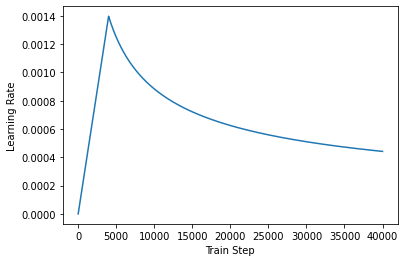

In [ ]:
plt.plot(leaning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")
plt.savefig(ROOT + '/data/lr.png')

### Model checkpoints
We prepare the to save and restore checkpoints.

In [ ]:
if os.path.isdir('../ckpt') is False:
    os.mkdir('../ckpt')

In [ ]:
checkpoint_path = ROOT + "/ckpt/"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("Latest checkpoint restored!!")

### Run the training

To train the model we provide as input to the encoder a batch of the source sequences. We also provide to the decoder a batch of target sequences that begin with the `start-of-sentence` token. This has the effect of shifting the sequence to the right.

The transformer will go through everything discussed above.
1. The encoder will encode the batch of sequences, capturing the important `contextual` and `structural` information. This continues through all the layers of the encoder.
2. The decoder will calculate attention at the `masked multi-head self-attention` layer. Because for each word the mask is applied to those words that come after, only the previous words are considered when calcualting attention.
3. At the `encoder-decoder attention` layer, the `attention matrix` that is the ouput of the `masked attention` layer is transformed and used for the `query`, and the output (memory) of the encoder is transformed twice and used for the `key` and value.
4. At this layer the decoder is learning to map the target words to the encoding.
5. This process is repeated for all the layers of the decoder until the final ouput.
6. The final output is a list of probabilities for each word in the vocabulary.
7. Calculate the `loss function` and `perform back propagation` and adjust the weights.
8. Rinse and repeat.

In [ ]:
EPOCHS = 10
for epoch in range(EPOCHS):
    print("Start of epoch {}".format(epoch+1))
    start = time.time()

    train_loss.reset_states()
    train_accuracy.reset_states()

    for (batch, (enc_inputs, targets)) in enumerate(dataset):

        # Include the start token which shifts sequence to the right
        dec_inputs = targets[:, :-1]

        # Target without the start token. The end token is included to know when the
        # model reaches the end of the sequence
        dec_outputs_real = targets[:, 1:]

        with tf.GradientTape() as tape:
            predictions, _ = transformer(enc_inputs, dec_inputs, True)
            loss = loss_function(dec_outputs_real, predictions)

        # Calculate and apply the gradients
        gradients = tape.gradient(loss, transformer.trainable_variables)
        optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

        train_loss(loss)
        train_accuracy(dec_outputs_real, predictions)

        if batch % 50 == 0:
            print("Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}".format(
                epoch+1, batch, train_loss.result(), train_accuracy.result()))

    ckpt_save_path = ckpt_manager.save()
    print("Saving checkpoint for epoch {} at {}".format(epoch+1,
                                                        ckpt_save_path))
    print("Time taken for 1 epoch: {} secs\n".format(time.time() - start))

Start of epoch 1
Epoch 1 Batch 0 Loss 5.4084 Accuracy 0.0000
Epoch 1 Batch 50 Loss 5.4664 Accuracy 0.0007
Epoch 1 Batch 100 Loss 5.4259 Accuracy 0.0109
Epoch 1 Batch 150 Loss 5.3637 Accuracy 0.0159
Epoch 1 Batch 200 Loss 5.2770 Accuracy 0.0185
Epoch 1 Batch 250 Loss 5.1837 Accuracy 0.0212
Epoch 1 Batch 300 Loss 5.0830 Accuracy 0.0246
Epoch 1 Batch 350 Loss 4.9687 Accuracy 0.0293
Epoch 1 Batch 400 Loss 4.8644 Accuracy 0.0346
Epoch 1 Batch 450 Loss 4.7691 Accuracy 0.0398
Epoch 1 Batch 500 Loss 4.6766 Accuracy 0.0447
Epoch 1 Batch 550 Loss 4.5967 Accuracy 0.0495
Epoch 1 Batch 600 Loss 4.5215 Accuracy 0.0542
Epoch 1 Batch 650 Loss 4.4468 Accuracy 0.0586
Epoch 1 Batch 700 Loss 4.3758 Accuracy 0.0627
Epoch 1 Batch 750 Loss 4.3077 Accuracy 0.0666
Epoch 1 Batch 800 Loss 4.2431 Accuracy 0.0702
Epoch 1 Batch 850 Loss 4.1816 Accuracy 0.0735
Epoch 1 Batch 900 Loss 4.1222 Accuracy 0.0767
Epoch 1 Batch 950 Loss 4.0657 Accuracy 0.0797
Epoch 1 Batch 1000 Loss 4.0138 Accuracy 0.0826
Epoch 1 Batch 1050 

## Evaluating

Now we are going to make some predictions.

For predictions, we iterate over the model. In the first pass we input the sentence to be translated to the encoder while the decoder's input only contains the `start-of-sentence` token. From this the model generates a probability distribution. Hopefylly the highest probability results in choosing the correct first word in the translation.

In the second iteration, the word that was predicted is added to the decoder's input, so that now the model tries to predict the next word based on having the `start-of-sentence` token and the first predicted word.

We continue predicting and appending to the input until we reach the `end-of-sentence` token. That completes the sentence.

In [ ]:
def evaluate(inp_sentence):
    '''
    Takes the input sentence.
    '''
    inp_sentence = [VOCAB_SIZE_EN-2] + tokenizer_en.encode(inp_sentence) + [VOCAB_SIZE_EN-1]

    # Expand dims to account for batch_size
    enc_input = tf.expand_dims(inp_sentence, axis=0)

    # Start with the s-o-s
    output = tf.expand_dims([VOCAB_SIZE_FR-2], axis=0)

    for _ in range(MAX_LENGTH):
        predictions, attention_weights = transformer(enc_input, output, False)

        prediction = predictions[:, -1:, :]

        # Get highest probability
        predicted_id = tf.cast(tf.argmax(prediction, axis=-1), tf.int32)

        # If e-o-s return
        if predicted_id == VOCAB_SIZE_FR-1:
            return tf.squeeze(output, axis=0), attention_weights

        # Concat last prediction to decoder input
        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

**Plot the attention weights for a decoder layer**

In [ ]:
def plot_attention_weights(attention, sentence, result, layer):
    fig = plt.figure(figsize=(16, 8))
    sentence = tokenizer_en.encode(sentence)
    attention = tf.squeeze(attention[layer], axis=0)

    for head in range(attention.shape[0]):

        ax = fig.add_subplot(2, 4, head+1)

        # plot the attention weights
        ax.matshow(attention[head][:-1, :], cmap='viridis')
        fontdict = {'fontsize': 10}

        ax.set_xticks(range(len(sentence)+2))
        ax.set_yticks(range(len(result)))
        ax.set_ylim(len(result)-1.5, -0.5)
        ax.set_xticklabels(
            ['<start>']+[tokenizer_en.decode([i]) for i in sentence]+['<end>'],
            fontdict=fontdict, rotation=90)

        ax.set_yticklabels([tokenizer_fr.decode([i]) for i in result
                            if i < VOCAB_SIZE_FR-2],
                           fontdict=fontdict)

        ax.set_xlabel('Head {}'.format(head+1))
    plt.tight_layout()
    plt.show()

#### Translate function

We use this function to test our translations. It calls the `evaluate` function to make the predictions and if given the decoder layer and block, produces a plot of the attention weights.

In [ ]:
def translate(sentence, plot=''):
    #output, attention_weights
    output, attention_weights = evaluate(sentence) #.numpy()
    print(f'wts shape: {attention_weights.keys()}')
    output = output.numpy()

    predicted_sentence = tokenizer_fr.decode(
        [i for i in output if i < VOCAB_SIZE_FR-2]
    )

    print("Input: {}".format(sentence))
    print("Predicted translation: {}".format(predicted_sentence))
    if plot:
        plot_attention_weights(attention_weights, sentence, output, plot)

### Let's translate

Now we try some translations and see how it turns out. We also get to see what the attention looks like by plotting it.

I verify the translations that follow by running the resultant french text through `Google translate`.

---
**Source: "This is a really powerful tool!"**

**Translation: "C'est un instrument très puissant"**

**Google: "It is a very powerful instrument"**

This is very close.

In [ ]:
translate("This is a really powerful tool!", plot='decoder_layer4_block2')

---
**Source: "what is your name?"**

**Translation: "Quel est votre nom ?"**

**Google: "What is your name ?"**

Perfect.

In [ ]:
translate("what is your name?", plot='decoder_layer4_block2')

---
**Source: "You are beutiful."**

**Translation: "Vous êtes très sincère"**

**Google: "You are very sincere"**

Almost. But notice that beautiful is misspelled, so it's sort of impressive that the translation is so close.

In [ ]:
translate("You are beutiful.", plot='decoder_layer4_block2')

---
**Source: "I love you."**

**Translation: "Je vous aime"**

**Google: "I like You"**

Well, in this case I'd say that Google got it wrong. The translation is correct.

In [ ]:
translate("I love you.", plot='decoder_layer4_block2')

---
**Source: "How are you?"**

**Translation: "Comment avez-vous"**

**Google: "How did you"**

One word wrong.

wts shape: dict_keys(['decoder_layer4_block1', 'decoder_layer4_block2'])
Input: How are you?
Predicted translation: Comment avez-vous ?


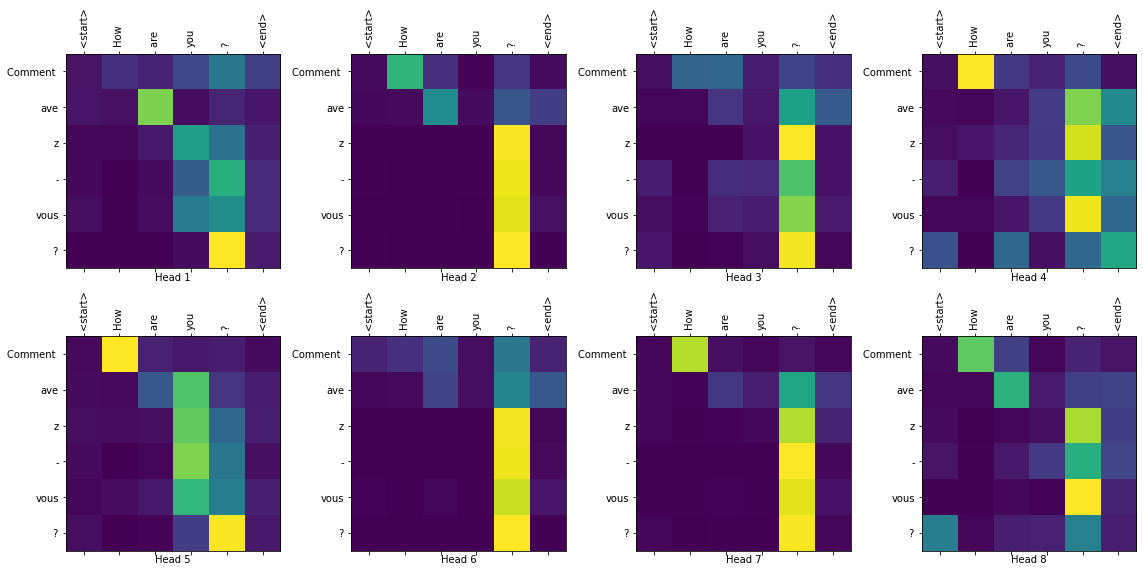

In [ ]:
translate("How are you?", plot='decoder_layer4_block2')

## Results

As a proof of concept the results were encouraging. We have to keep in mind that the model used here was a scaled-down version of the model specified in the paper. They used 6 encoder layers and 6 decoder layers. We used 4 and 4. They used an embedding size of 512 - we used 128. They used 2048 nodes in the FFNs - we used 512. We did this to save on computational cost.

Based on these results, I have no doubt that increasing these hyper-parameter to match or exceed those used in the paper would cause the accuracy to improve greatly.  

## Future Work

* Expand the model to match or exceed the model referenced in the original paper "[Attention is all you need](https://arxiv.org/pdf/1706.03762.pdf)".
* Experiment with other varients of the transformer such as GPT-2 or BERT.
* Ultimately to build a full two way language translation model using voice recognition, allowing two or more people speaking different languages to comunicate using their native languages.

## Summary

We built a `Transformer` based on the paper "[Attention is all you need] We built it from scratch using the `Tensorflow` framework. We did this because it provides an opportunity to learn all of the hidden details of the model.

So what did we learn?

In Seq2Seq models
